<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/bia/lab3/exercises_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

Acuracy: 0.9666666666666667


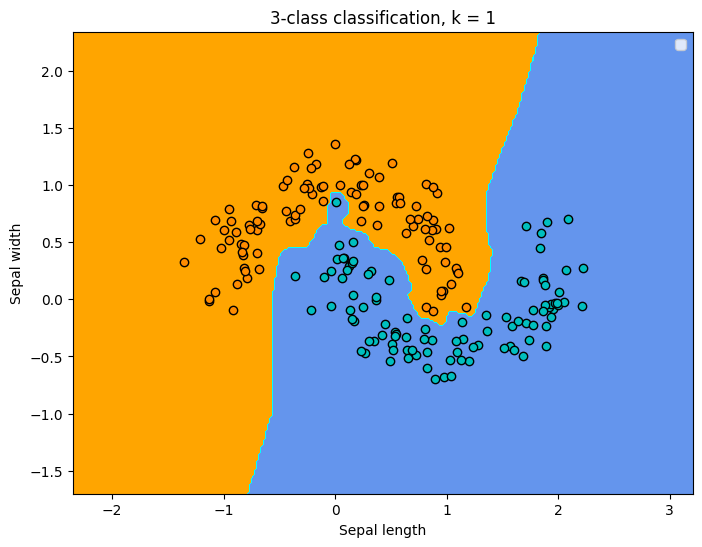

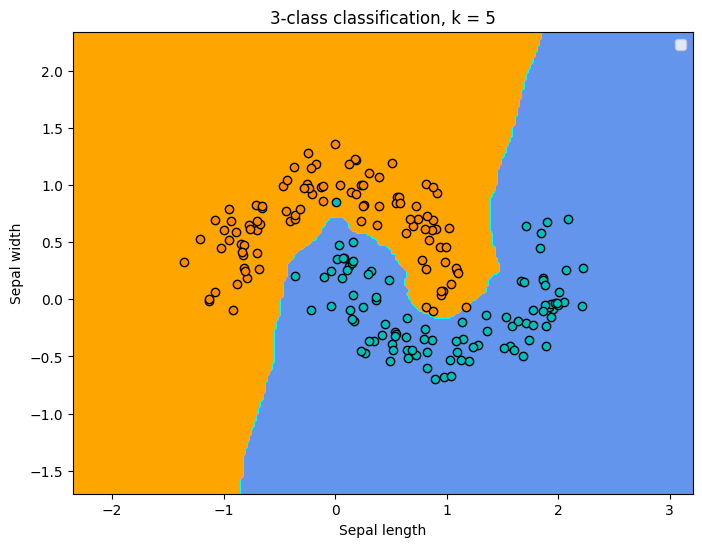

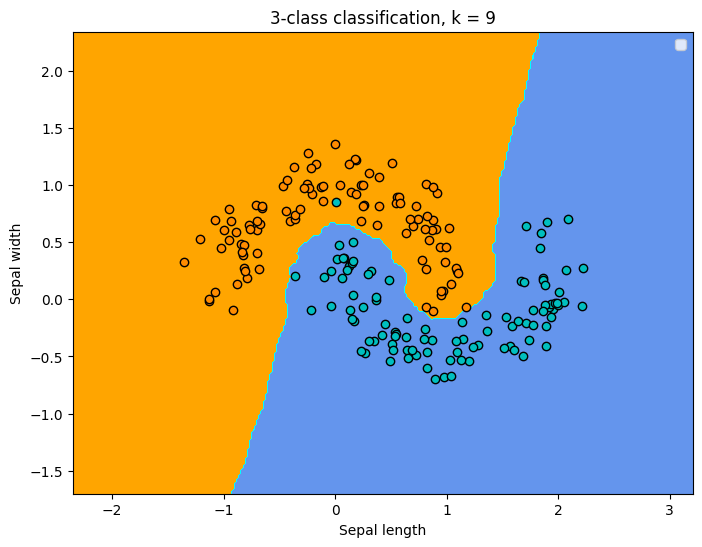

In [ ]:
# exercise 1

moons_dataset = make_moons(n_samples=200, noise=0.15, random_state=42)

X, y = moons_dataset[0], moons_dataset[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)

print(f'Acuracy: {clf.score(X_test, y_test)}')

h = 0.02  # Step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for n_neighbors in [1, 5, 9]:
    # We create an instance of KNeighborsClassifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    for i in range(3):
      plt.scatter(X[:, 0][y==i], X[:, 1][y==i], c=cmap_bold[i],
                  edgecolors="black")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-class classification, k = %i" % (n_neighbors))
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend()

plt.show()

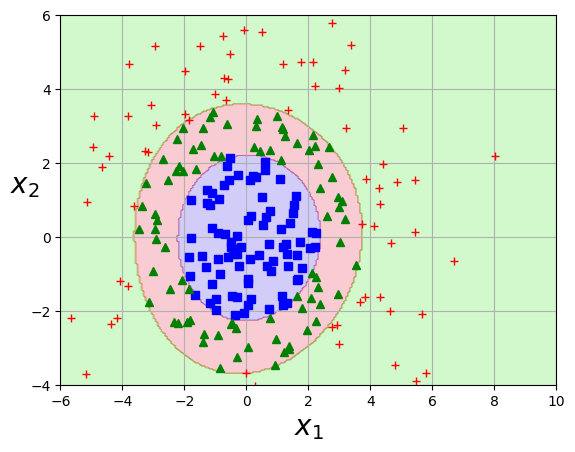

In [ ]:
# exercise 2

X1, y1 = make_gaussian_quantiles(cov=7., n_samples=250, n_features=2, n_classes=3, random_state=1)

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=10, C=5))
    ])
poly_kernel_svm_clf.fit(X1, y1)

def plot_dataset(X, y, axes):
    plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "bs")
    plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "g^")
    plt.plot(X1[:, 0][y1==2], X1[:, 1][y1==2], "r+")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 250)
    x1s = np.linspace(axes[2], axes[3], 250)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

segments = [-1.5, 2.5, -1, 1.5]
segments = [i * 4 for i in segments]
plot_predictions(poly_kernel_svm_clf, segments )
plot_dataset(X1, y1, segments)

plt.show()

Text(0, 0.5, '$y$')

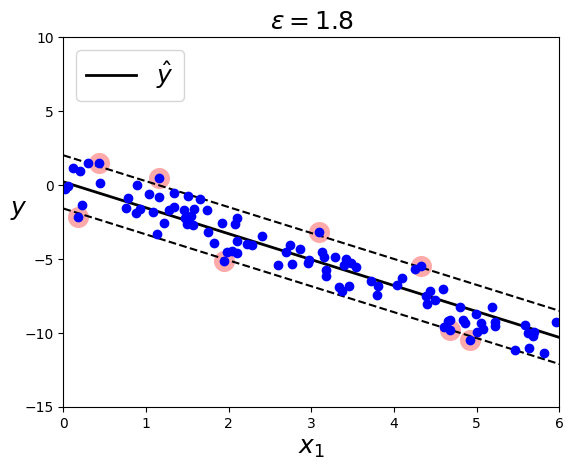

In [5]:
# exercise 3

n = 100
X = 6 * np.random.rand(n, 1)
y = (1 - 2 * X + np.random.randn(n, 1)).ravel()
svm_reg1 = LinearSVR(epsilon=1.8, random_state=42)
svm_reg1.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=200, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plot_svm_regression(svm_reg1, X, y, [0, 6, -15, 10])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)